1.Create folders in the Colab environment

In [35]:
# Run this cell to make the folder structure
import os

os.makedirs('/content/ds_Rosalint_Celcia/csv_files', exist_ok=True)
os.makedirs('/content/ds_Rosalint_Celcia/outputs', exist_ok=True)

print("Folders created at /content/ds_Rosalint_Celcia")

Folders created at /content/ds_Rosalint_Celcia


2. Load the datasets and preview

In [36]:
import pandas as pd

# change filenames if they are different
trader_path = '/content/historical_data.csv'
sentiment_path = '/content/fear_greed_index.csv'

trader = pd.read_csv(trader_path, low_memory=False)
sentiment = pd.read_csv(sentiment_path, low_memory=False)

# Quick preview
print("Trader data shape:", trader.shape)
display(trader.head())

print("Sentiment data shape:", sentiment.shape)
display(sentiment.head())

Trader data shape: (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Sentiment data shape: (2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [37]:
#print all column names
trader.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

3.Clean & preprocess — trader data

In [38]:
# Use the IST timestamp
trader_raw = pd.read_csv('/content/historical_data.csv', low_memory=False)

# Convert to datetime (day-month-year format)
trader_raw['Timestamp IST'] = pd.to_datetime(trader_raw['Timestamp IST'], format="%d-%m-%Y %H:%M")

# Create a DATE column for merging with sentiment
trader_raw['date'] = trader_raw['Timestamp IST'].dt.date


4. Cleaned Dataframe

In [39]:
# Build trader dataframe
trader = trader_raw.copy()

# Standardize column names
trader.columns = [c.strip().lower().replace(' ', '_') for c in trader.columns]

# Check the cleaned timestamp column
trader['date'] = trader['timestamp_ist'].dt.date

trader.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


5. Merge Dataset

In [45]:
merged = trader.merge(sentiment, on='date', how='left')
merged['classification'].value_counts(dropna=False)

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400
NaN,6


In [46]:
merged['classification'].value_counts(dropna=False)

,count
classification,
Fear,61837
Greed,50303
Extreme Greed,39992
Neutral,37686
Extreme Fear,21400
NaN,6


6.Correct Aggregation for All Sentiment Categories

In [47]:
agg_funcs = {
    'trade_value': ['sum', 'mean', 'median'],
    'closed_pnl': ['sum', 'mean', 'median'],
    'size_usd': ['sum', 'mean', 'median'],
    'is_profitable': ['mean'],
    'date': ['nunique']
}

summary = merged.groupby('classification').agg(agg_funcs)

summary.columns = ['_'.join(col).strip() for col in summary.columns]
display(summary)


,trade_value_sum,trade_value_mean,trade_value_median,closed_pnl_sum,closed_pnl_mean,closed_pnl_median,size_usd_sum,size_usd_mean,size_usd_median,is_profitable_mean,date_nunique
classification,,,,,,,,,,,
Extreme Fear,1.144843e+08,5349.731843,766.150,7.391102e+05,34.537862,0.0,1.144843e+08,5349.731843,766.150,0.370607,14
Extreme Greed,1.244652e+08,3112.251565,500.050,2.715171e+06,67.892861,0.0,1.244652e+08,3112.251565,500.050,0.464943,114
Fear,4.833248e+08,7816.109931,735.960,3.357155e+06,54.290400,0.0,4.833248e+08,7816.109931,735.960,0.420768,91
Greed,2.885825e+08,5736.884375,555.000,2.150129e+06,42.743559,0.0,2.885825e+08,5736.884375,555.000,0.384828,193
Neutral,1.802421e+08,4782.732661,547.655,1.292921e+06,34.307718,0.0,1.802421e+08,4782.732661,547.655,0.396991,67


7. Visualizations

1️⃣ Total trade value by sentiment

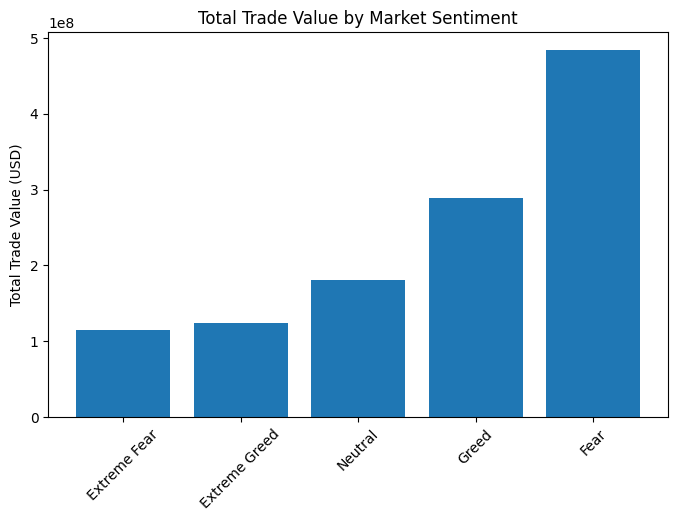

In [48]:
out_dir = '/content/ds_Rosalint_Celcia/outputs'

vol = merged.groupby('classification')['trade_value'].sum().sort_values()

plt.figure(figsize=(8,5))
plt.bar(vol.index, vol.values)
plt.title('Total Trade Value by Market Sentiment')
plt.ylabel('Total Trade Value (USD)')
plt.xticks(rotation=45)
plt.savefig(f'{out_dir}/volume_trend.png', bbox_inches='tight')
plt.show()


2️⃣ Average Closed PnL by sentiment

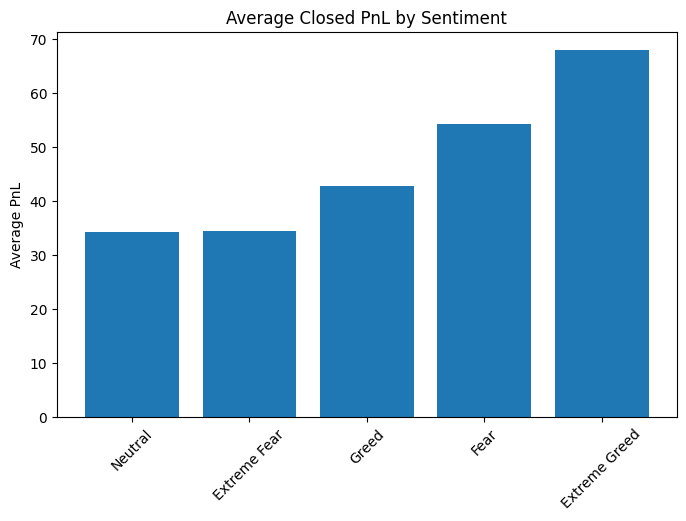

In [49]:
pnl = merged.groupby('classification')['closed_pnl'].mean().sort_values()

plt.figure(figsize=(8,5))
plt.bar(pnl.index, pnl.values)
plt.title('Average Closed PnL by Sentiment')
plt.ylabel('Average PnL')
plt.xticks(rotation=45)
plt.savefig(f'{out_dir}/pnl_vs_sentiment.png', bbox_inches='tight')
plt.show()


3️⃣ Profitability Rate by sentiment

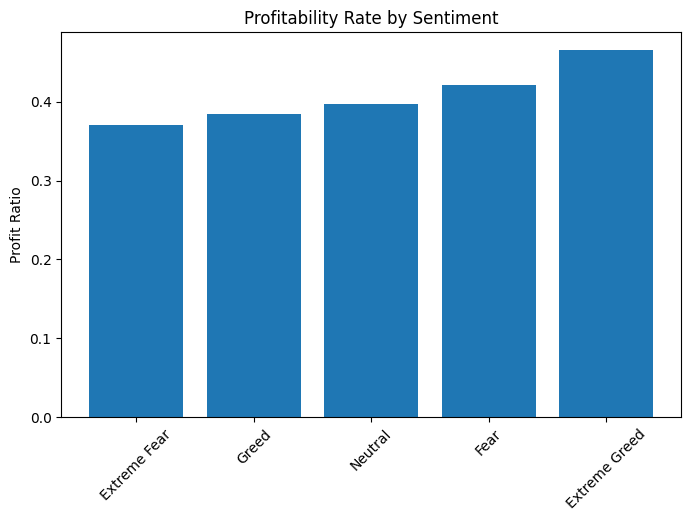

In [50]:
prof = merged.groupby('classification')['is_profitable'].mean().sort_values()

plt.figure(figsize=(8,5))
plt.bar(prof.index, prof.values)
plt.title('Profitability Rate by Sentiment')
plt.ylabel('Profit Ratio')
plt.xticks(rotation=45)
plt.savefig(f'{out_dir}/profitability_vs_sentiment.png', bbox_inches='tight')
plt.show()


4️⃣ Correlation heatmap

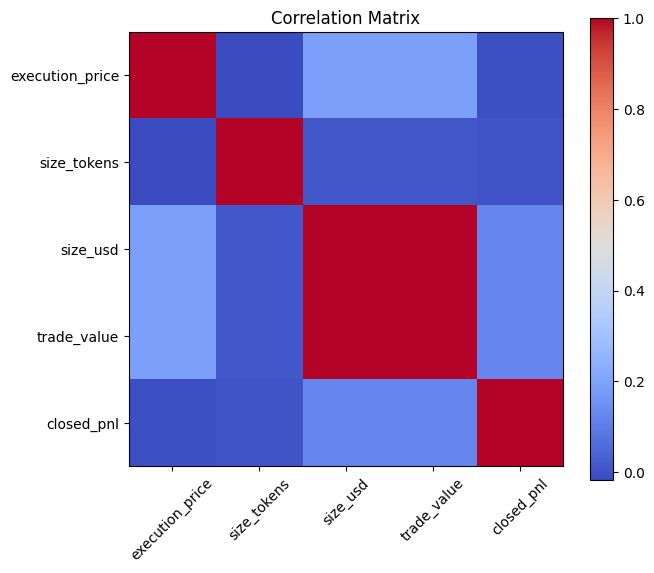

In [51]:
numeric_cols = ['execution_price','size_tokens','size_usd','trade_value','closed_pnl']
numeric = merged[numeric_cols].apply(pd.to_numeric, errors='coerce').dropna()
corr = numeric.corr()

plt.figure(figsize=(7,6))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title('Correlation Matrix')
plt.savefig(f'{out_dir}/correlation_heatmap.png', bbox_inches='tight')
plt.show()
